### Instructions
1. Construct a random surfer simulation that gives the same results as the PageRank
algorithm.
2. Visualize the PageRank results by varying node color in your network.
3. Draw a plot showing how the error in your simulation results decreases as the random
surfer simulation is run for more steps.

In [59]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

In [79]:
def get_next_node(g, alpha, current_node):
    neighbors = list(g.neighbors(current_node))
    if len(neighbors)>0:
        if np.random.random() < alpha:
            return np.random.choice(neighbors)
    node_choice = np.random.choice(g.nodes())
    while node_choice == current_node:
        node_choice = np.random.choice(g.nodes())
    return node_choice

def run_surfer_simulation(g, t=100, alpha = 0.85):

    sg = g.copy() #surfer graph
    
    current_node = np.random.choice(sg.nodes())

    for node in sg.nodes():
        sg.nodes[node]["visits"] = 0

    for _ in range(t):
        sg.nodes[current_node]["visits"] += 1
        current_node = get_next_node(sg, alpha, current_node)

    for node in sg.nodes():
        sg.nodes[node]["visits"] /= t
    
    return sg


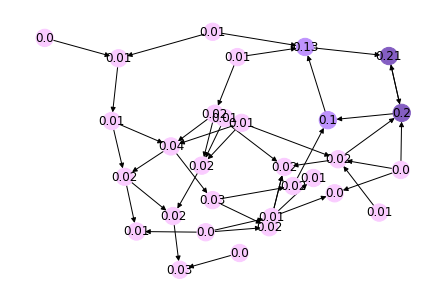

Network distribution given visits percentage after running surfer simulation for 100 time steps.


In [88]:
node_count = 30
time_steps = 100
g = nx.erdos_renyi_graph(node_count, 0.05, directed=True, seed=123)
pagerank_visits = nx.pagerank(g)

sg = run_surfer_simulation(g, time_steps)
simulated_visits = nx.get_node_attributes(sg, 'visits') 
color_choices = ["#FACCFF","#DCB0FF","#BE93FD","#A178DF","#845EC2"]
color_map = []
max_value = max(simulated_visits.values())+0.01

for node_visits in simulated_visits.values():
    color_choice = color_choices[math.floor(node_visits/max_value * len(color_choices))]
    color_map.append(color_choice)

nx.draw(sg,labels=simulated_visits, node_color=color_map, pos=nx.kamada_kawai_layout(g))
plt.show()
print("Fig. 1 Network distribution given visits percentage after running surfer simulation for 100 time steps.")


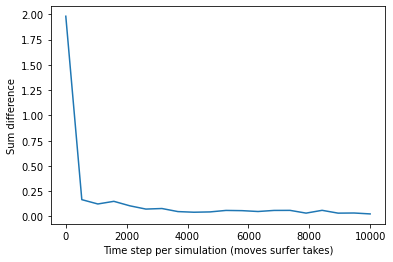

Sum difference in node visits between surfer simulation and pagerank results as we increase simulation length.


In [87]:
def compute_difference(simulated_visits, pagerank_visits):
    total_difference = 0
    for simulated_value, pagerank_value in zip(simulated_visits.values(),pagerank_visits.values()):
        total_difference += abs(simulated_value-pagerank_value)
    return total_difference

def run_comparison(time_step_range,node_count=30):

    g = nx.erdos_renyi_graph(node_count, 0.05, directed=True, seed=123)
    pagerank_visits = nx.pagerank(g)

    min_t, max_t = time_step_range
    time_steps = np.linspace(min_t,max_t,20)
    differences = []

    for time_step in time_steps:
        sg = run_surfer_simulation(g, round(time_step))
        simulated_visits = nx.get_node_attributes(sg, 'visits') 
        differences.append(compute_difference(simulated_visits,pagerank_visits))

    plt.plot(time_steps,differences)
    plt.xlabel("Time step per simulation (moves surfer takes)")
    plt.ylabel("Sum difference")
    plt.show()
    print("Fig. 2. Sum difference in node visits between surfer simulation and pagerank results as we increase simulation length.")

run_comparison((1,10000))